<img align="left" style="width: 170px;" src="udea_escudo.png">

# Laboratorio 5 PDS 2020-1
### Yorguin José Mantilla Ramos
CC.1127617499
 
Grupo:3


### 2. Transformada Z

Ecuación 9:
$$y[n] + 0,3y[n − 2] = x[n] + 15x[n − 1] − 2y[n − 1]$$

Que al despejar la función de transferencia queda:

$$\frac{Y(z)}{X(z)}=\frac{1+15z^{-1}}{1+2z^{-1}+0.3z^{-2}}$$

$$\frac{Y(z)}{X(z)}\frac{z^2}{z^2}=\frac{z^2+15z}{z^2+2z+0.3}$$
#### 2.1 Importe las funciones del archivo adjunto ztrans.py y úselas para graficar la respuesta en frecuencia y fase, la respuesta al impulso, la respuesta al escalón, y el diagrama de polos y ceros.

In [1]:
import ztrans as zt
num=[1, 15, 0]      #Númerador de mi función de transferencia.
den=[1, 2, 0.3]  #Denominador de mi función de transferencia.

#### 2.2 ¿Dónde están ubicados los polos y los ceros?


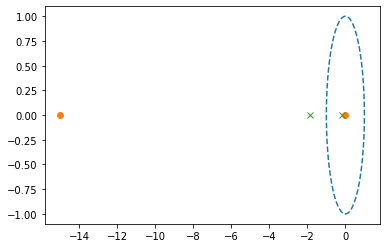

In [2]:
zt.zeropoles(num, den) #Diagrama de polos y ceros

Hay:

- Un cero en 0
- Un cero en -15
- Un polo alrededor de -2 qué al calcularlo es $\approx$ -1.83666
- Un polo alrededor de -0 qué al calcularlo es $\approx$ -0.16334

Como vemos todos los polos y ceros son reales

#### 2.3. ¿Que se puede decir de la respuesta en frecuencia y fase de la función de transferencia?


Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


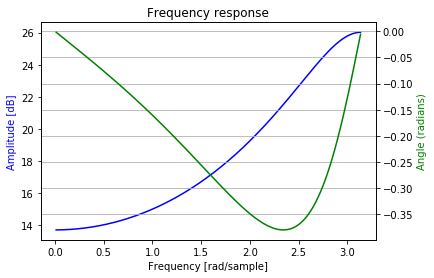

In [3]:
zt.mfreqz(num,den)     #Respuesta en frecuencia.(Magnitud y Fase )


- El filtro es un pasa altas
- El filtro es de fase no lineal

#### 2.4. ¿Que se puede decir acerca de la respuesta al impulso y al escalón?


Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


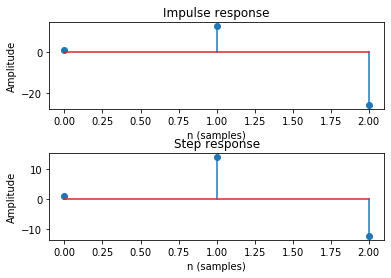

In [4]:
zt.impz(num,den)       #Respuesta al impulso, y respuesta al escalón

- El sistema es causal ya que ambas respuestas tienen valores para muestras positivas y son 0 para muestras negativas.
- La estabilidad no es muy clara en las respuestas al impulso/escalón.


#### 2.5. ¿Que se puede decir acerca de la estabilidad del sistema?

- El sistema no es estable ya que hay polos fuera del círculo unitario

### 3. Transformada Z: Introduccion a los filtros digitales

#### 3.1. Genere una señal sinusoidal cuya frecuencia se incremente en el tiempo de forma cuadrática. La señal debe tener una duración de 50 segundos y debe tener una frecuencia de muestreo de 8000Hz.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import my_utils as mu
import scipy.signal as sx
from IPython.display import Audio
from IPython.display import display

fs=8000 #Frecuencia de muestreo
start,stop = (0,50)
t=np.arange(start,stop,1/fs)  #vector de tiempo, donde la señal dura 50s.
uprate = 1
ws = 2*np.pi*((uprate*t)**2)
sig=np.sin(ws*t)
sig.shape

(400000,)

#### 3.2. Grafique y escuche la señal ¿Qué se puede decir acerca del audio?

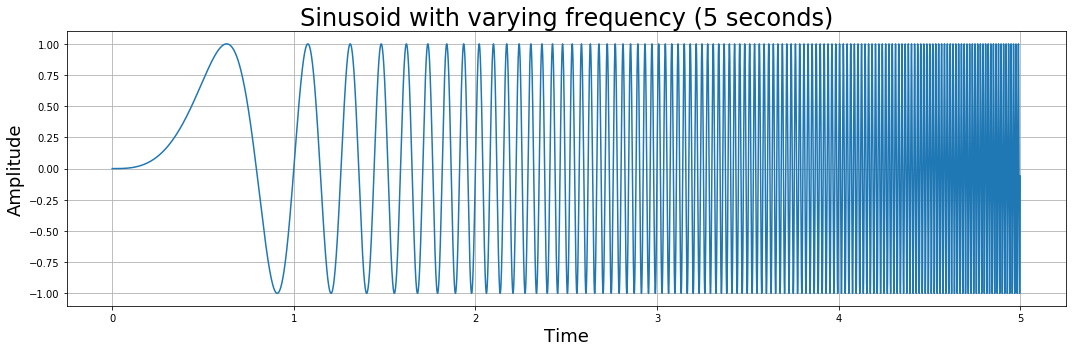

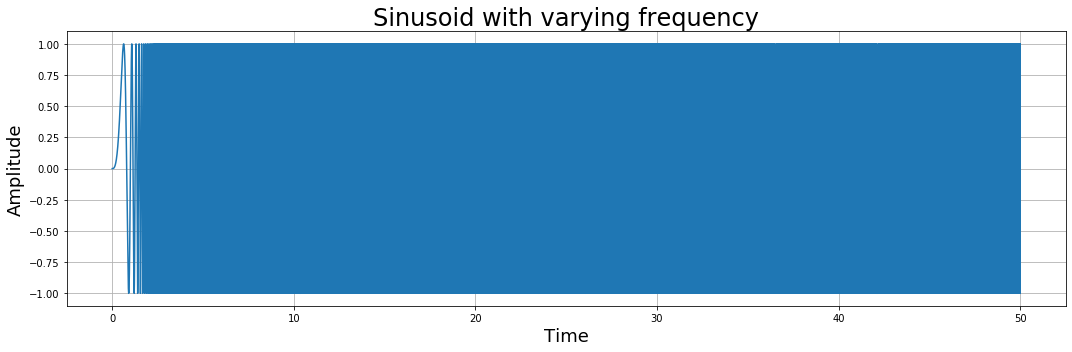

In [6]:
(plot_start,plot_stop) = (mu.s2f(0,fs),mu.s2f(5,fs))
mu.plot_signal(t[:plot_stop],sig[:plot_stop],xlabel='Time',ylabel='Amplitude',title='Sinusoid with varying frequency (5 seconds)',show=True)
mu.plot_signal(t,sig,xlabel='Time',ylabel='Amplitude',title='Sinusoid with varying frequency',show=True)

Audio(sig,rate=fs)

- En el audio se puede escuchar como la frecuencia aumenta 
- Modificando el valor de ``uprate`` en el código de arriba podemos configurar que tan rapido la frecuencia sube

#### 3.3. Genere la función de transferencia de un filtro de respuesta finita al impulso (FIR) usando las siguientes instrucciones.

In [7]:
n = 10
num_fir = sx.firwin(n, [0.2, 0.4], pass_zero=False)
den_fir=np.zeros(n)
den_fir[0] = 1

#### 3.4. Grafique la respuesta en frecuencia y fase, la respuesta al impulso, la respuesta al escalón, y el diagrama de polos y ceros del filtro FIR.

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


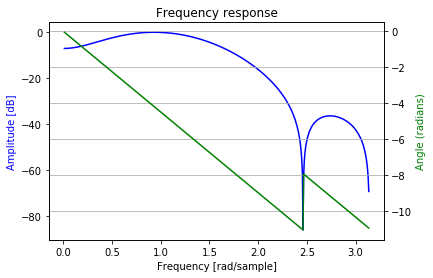

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


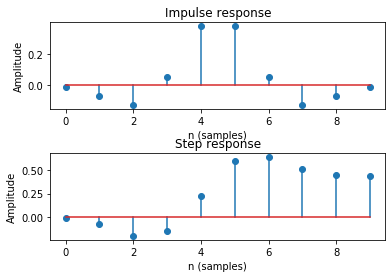

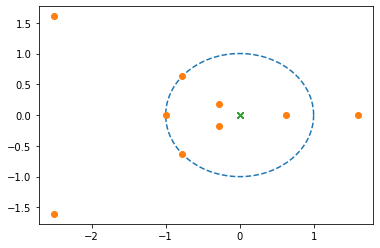

cutoffs: [0.44178647 0.44792239 0.45405831 1.39899048 1.4051264  1.41126232]
cutoffsHz [1767.14586764 1791.68956025 1816.23325286 5595.96191421 5620.50560681
 5645.04929942]
[1600. 5600.]


In [8]:
zt.mfreqz(num_fir,den_fir)     #Respuesta en frecuencia y Fase del filtro
zt.impz(num_fir,den_fir)       #Respuesta al impulso, y respuesta al escalón
zt.zeropoles(num_fir, den_fir) #Diagrama de polos y ceros

w,h = sx.freqz(num_fir,den_fir)
w=w[2:]
h=h[2:]

cutdB = -3
cutoffs = np.where(np.isclose(20 * np.log10(abs(h)),cutdB,atol=0.1)==True)
cutoffs = np.array(w[cutoffs])
print('cutoffs:',cutoffs)
cutoffsHz =  (fs/2) * cutoffs
print('cutoffsHz',cutoffsHz)
print(np.array([0.4,1.4])*fs/2)

#### 3.5. ¿Que puede concluir acerca de las gráficas anteriores? ¿Que tipo de filtro es? ¿Cuáles son las frecuencias de corte? ¿Dónde están ubicados los polos y ceros? ¿Que puede decir de la estabilidad del filtro?

- Tipo de filtro: Pasa-bajas aunque realmente no deja pasar 0 (DC) completamente como se impuso en el argumento ``pass_zero=False``, en ese sentido tambien se puede considerar como una especie de pasa-bandas.
- Su respuesta al impulso es finita
- Su comportamiento en fase es lineal
- Para leer la gráfica notemos que en el eje de frecuencia normalizada = 1 se tiene la frecuencia de Nyquist
- Las frecuencias de corte entonces estan alrededor de 0.4 y 1.4 en rads/sample que equivalen a 1600Hz y 5600Hz
- Notemos que 1600Hz corresponde al argumento 0.4 de la función, el argumento 0.2 correspondería a 800Hz pero este ultimo no lo conseguimos como frecuencia de corte
- La frecuencia de corte encontrada de 5600Hz es en realidad una frecuencia que tiene aliasing por lo que realmente nunca se toca como tal y corresponde en realidad a 1600Hz al tener aliasing.
- Para llevar las frecuencias
- Solo hay un polo ubicado en 0
- Hay 9 ceros ubicados tanto afuera como adentro del circulo unitario, y algunos sobre este.
- Como todos los polos estan dentro del circulo unitario el filtro es estable.
- La estabilidad se puede ver en las respuestas al impulso y al escalón (impulso decae a 0, escalon se estbiliza alrededor de 0.5)

#### 3.6. Calcule la respuesta del filtro ante la señal generada previamente. Grafique la señal antes y despues de pasar por el filtro. ¿Que le ocurrió a la señal?

C:\software\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


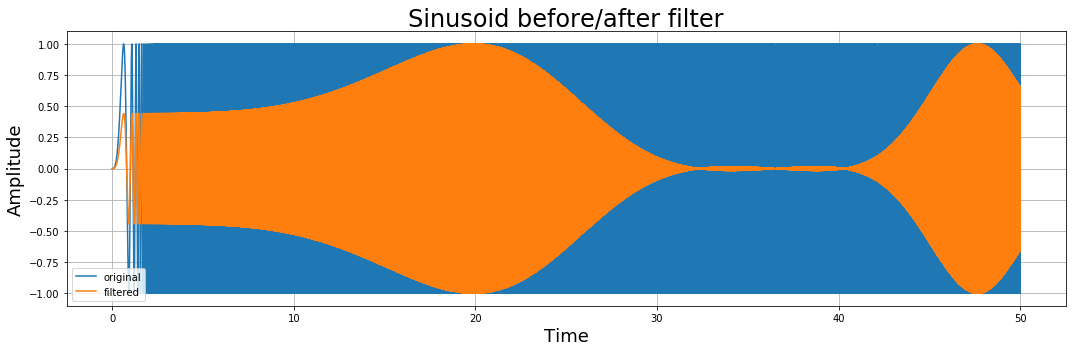

In [9]:
sig_filtered = np.convolve(sig, num_fir, mode='same')


fig,ax= mu.plot_signal(t,sig,xlabel='Time',ylabel='Amplitude',title='Sinusoid before/after filter',ret=True,show=False)
ax.plot(t,sig_filtered)
ax.legend(['original','filtered'])
plt.show()




- El filtro fue alterando la amplitud de la sinusoide de acuerdo a su respuesta en frecuencia.
- Cuando la sinusoide estaba debajo de la primera frecuencia de corte la amplitude se atenua
- Cuando la sinusoide estaba entre las dos frecuencias de corte la amplitud era por lo menos de 0.707
- Cuando la sinusoide estaba despues de la segunda frecuencia de corte la amplitud se atenua casi completamente para algunas frecuencias
- Notemos que la señal alrededor de los 45 segundos vuelve a tener una amplitud alta, esto puede ser debido al aliasing. Si la sinusoide llego a sobrepasar la frecuencia de nyquist se ven frecuencias fantasmas que pueden estar de nuevo en el rango de paso del filtro.
- Practicamente este experimento refleja el comportamiento del filtro así como se ve en la respuesta en frecuencia.

#### 3.7. Aumente progresivamente el orden n del filtro (mınimo 3 veces), repita el procedimiento anterior (items 3, 4, 5, y 6), y concluya. Que puede decir de la respuesta en frecuencia (fase y potencia), y de los polos y ceros.

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


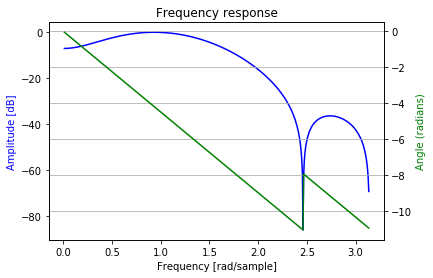

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


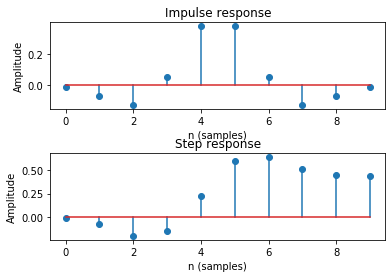

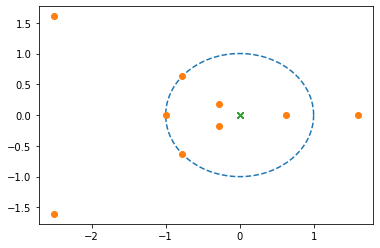

cutoffs: [0.44178647 0.44792239 0.45405831 1.39899048 1.4051264  1.41126232]


C:\software\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


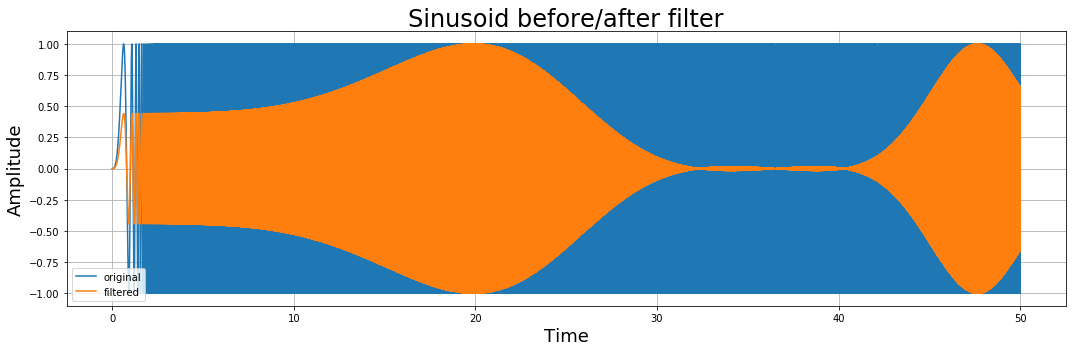

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


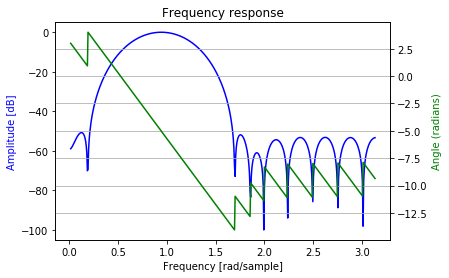

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


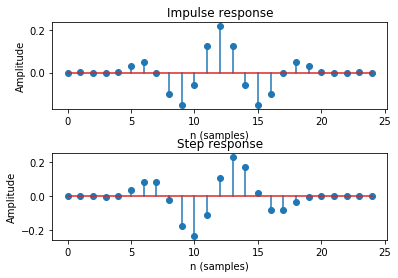

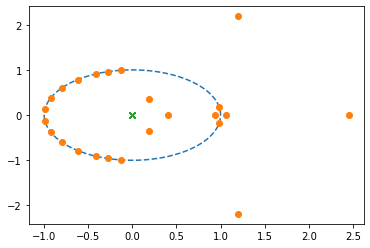

cutoffs: [0.69949524 0.70563116 1.18423317]


C:\software\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


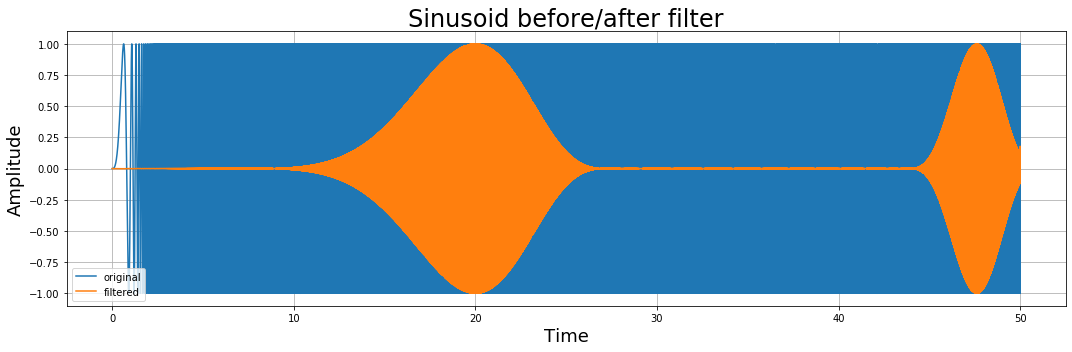

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


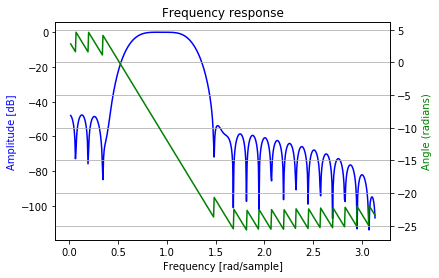

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


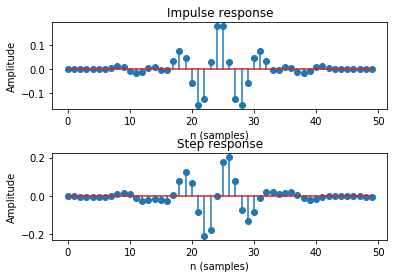

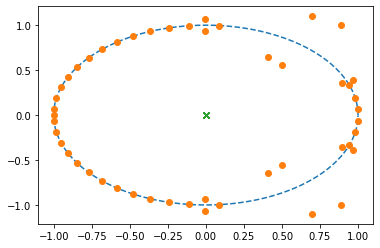

cutoffs: [0.68108747 1.20264094]


C:\software\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


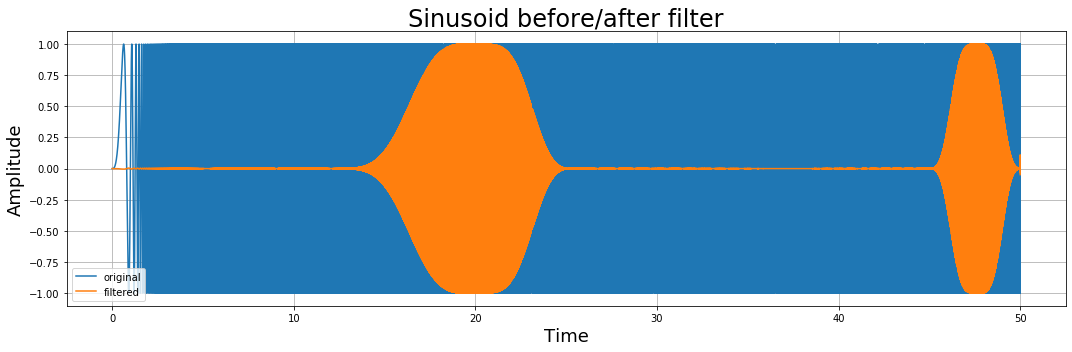

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


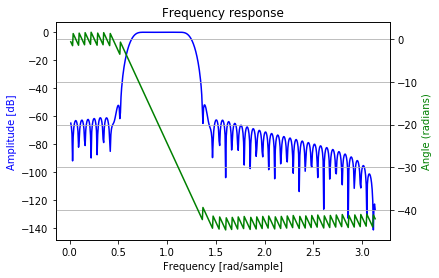

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


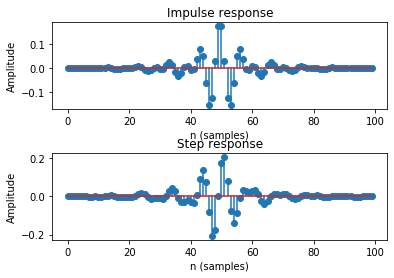

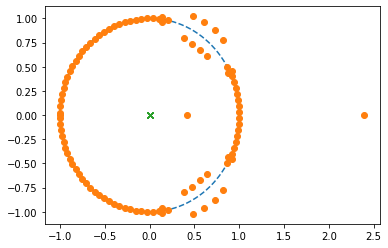

cutoffs: []


C:\software\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


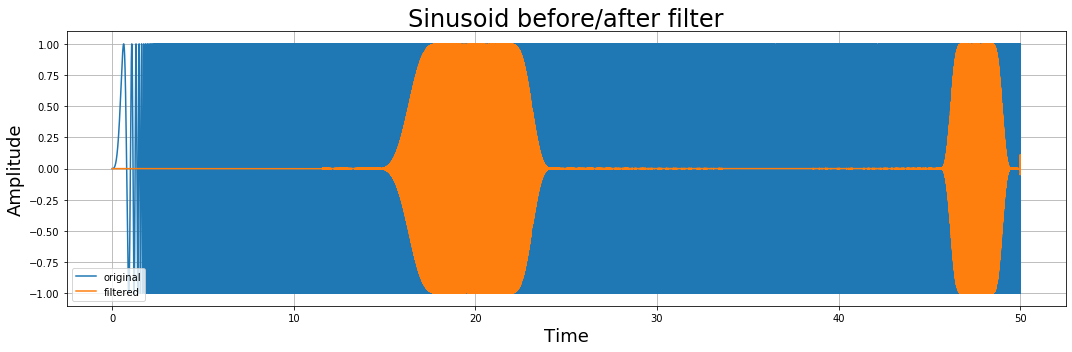

In [10]:
for n in [10,25,50,100]:

    num_fir = sx.firwin(n, [0.2, 0.4], pass_zero=False)
    den_fir=np.zeros(n)
    den_fir[0] = 1

    zt.mfreqz(num_fir,den_fir)     #Respuesta en frecuencia y Fase del filtro
    zt.impz(num_fir,den_fir)       #Respuesta al impulso, y respuesta al escalón
    zt.zeropoles(num_fir, den_fir) #Diagrama de polos y ceros

    w,h = sx.freqz(num_fir,den_fir)
    w=w[2:]
    h=h[2:]

    cutdB = -3
    cutoffs = np.where(np.isclose(20 * np.log10(abs(h)),cutdB,atol=0.1)==True)
    print('cutoffs:',w[cutoffs])

    sig_filtered = np.convolve(sig, num_fir, mode='same')


    fig,ax= mu.plot_signal(t,sig,xlabel='Time',ylabel='Amplitude',title='Sinusoid before/after filter',ret=True,show=False)
    ax.plot(t,sig_filtered)
    ax.legend(['original','filtered'])
    plt.show()



- A medida de que aumenta el orden más grande es el soporte de la respuesta al impulso, teniendo tantos puntos como el orden del filtro - 1
- A medida que aumenta el orden más selectivo es el filtro, y además se produce una mayor cantidad de lobulos
- A medida que aumenta el orden se colocan más ceros en el circulo unitario.
- Podemos ver que en aplicaciones de tiempo real el orden no puede ser muy grande ya que necesitamos demasiados puntos de la señal
- En general siempre se mantuvo el patrón de que hubiera un solo polo
- Aparentemente orden = #polos + #ceros


#### 3.8. Genere una señal sinusoidal cuya frecuencia se vaya incrementando en el tiempo de forma cúbica, la señal debe tener la misma duración y una frecuencia de muestreo de 8000 Hz. Repita los pasos 3, 4, 5 y 6. Concluya de acuerdo a las gráficas obtenidas.

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


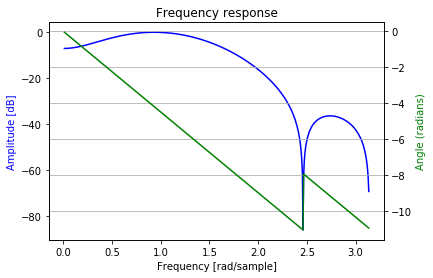

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


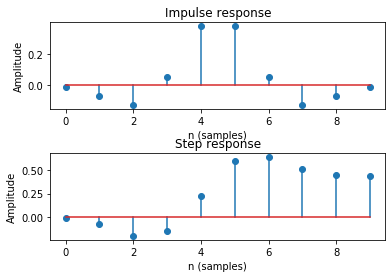

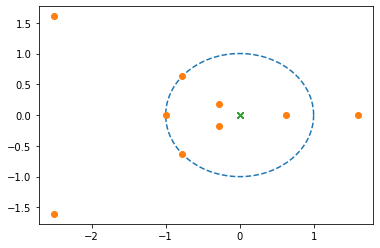

cutoffs: [0.44178647 0.44792239 0.45405831 1.39899048 1.4051264  1.41126232]


C:\software\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


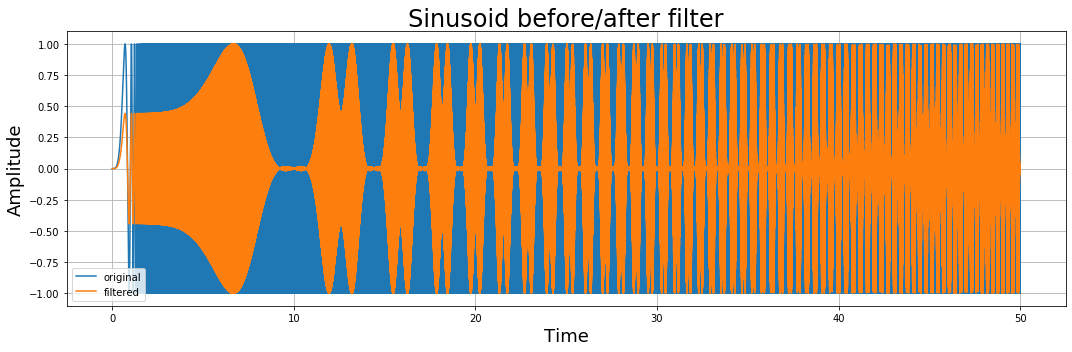

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


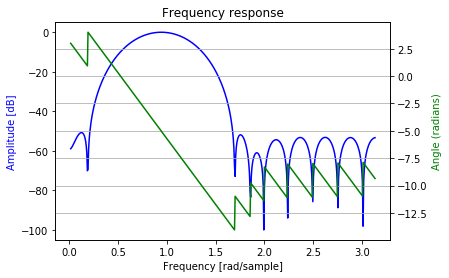

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


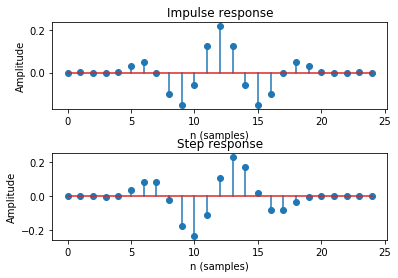

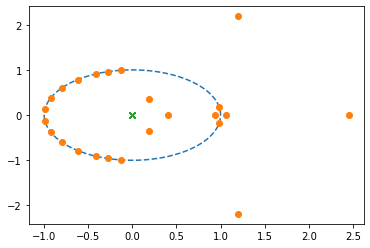

cutoffs: [0.69949524 0.70563116 1.18423317]


C:\software\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


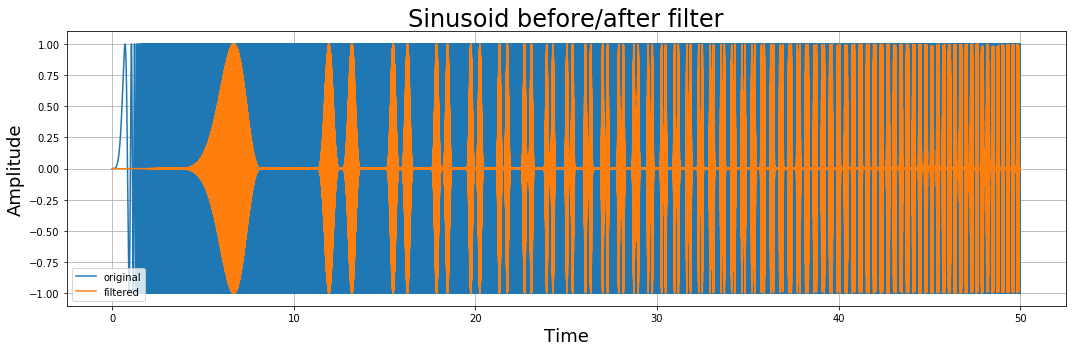

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


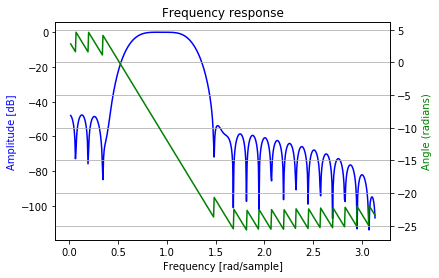

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


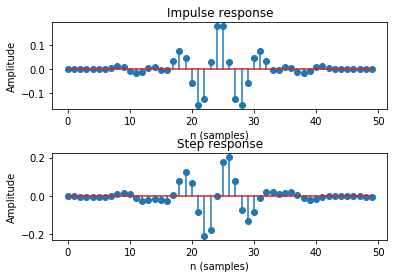

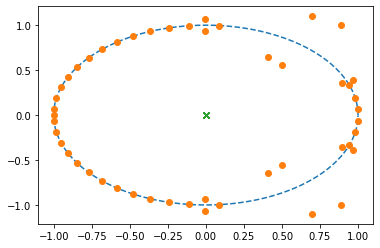

cutoffs: [0.68108747 1.20264094]


C:\software\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


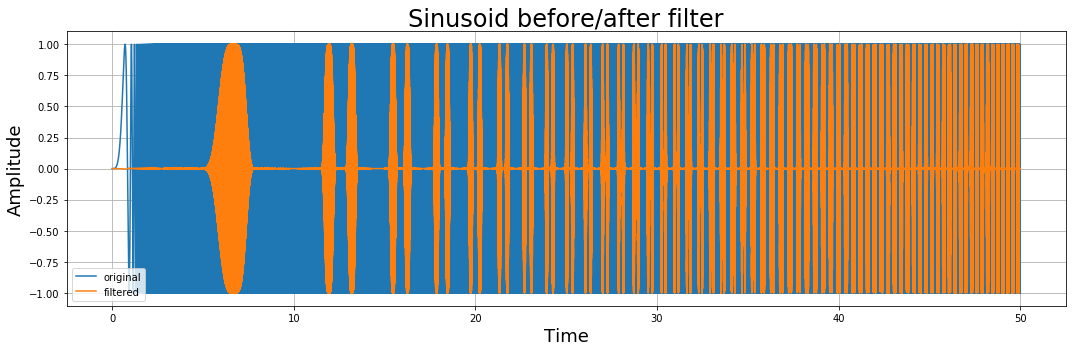

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


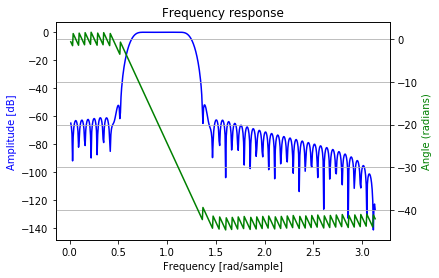

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


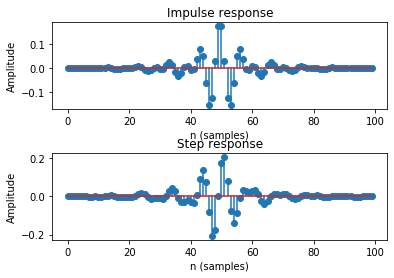

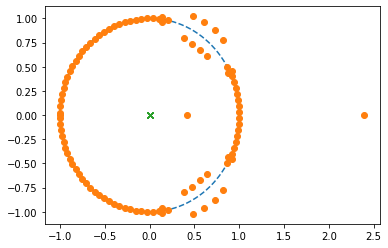

cutoffs: []


C:\software\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


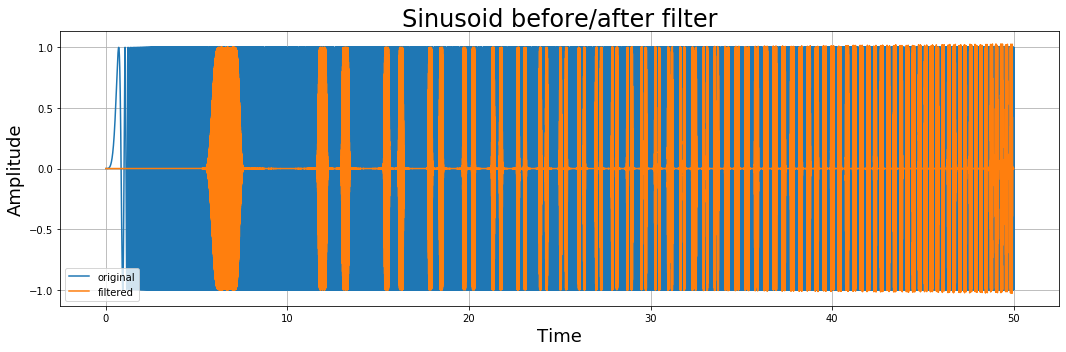

In [11]:
fs=8000 #Frecuencia de muestreo
start,stop = (0,50)
t=np.arange(start,stop,1/fs)  #vector de tiempo, donde la señal dura 50s.
uprate = 1
ws = 2*np.pi*((uprate*t)**3)
sig=np.sin(ws*t)

for n in [10,25,50,100]:

    num_fir = sx.firwin(n, [0.2, 0.4], pass_zero=False)
    den_fir=np.zeros(n)
    den_fir[0] = 1

    zt.mfreqz(num_fir,den_fir)     #Respuesta en frecuencia y Fase del filtro
    zt.impz(num_fir,den_fir)       #Respuesta al impulso, y respuesta al escalón
    zt.zeropoles(num_fir, den_fir) #Diagrama de polos y ceros

    w,h = sx.freqz(num_fir,den_fir)
    w=w[2:]
    h=h[2:]

    cutdB = -3
    cutoffs = np.where(np.isclose(20 * np.log10(abs(h)),cutdB,atol=0.1)==True)
    print('cutoffs:',w[cutoffs])

    sig_filtered = np.convolve(sig, num_fir, mode='same')


    fig,ax= mu.plot_signal(t,sig,xlabel='Time',ylabel='Amplitude',title='Sinusoid before/after filter',ret=True,show=False)
    ax.plot(t,sig_filtered)
    ax.legend(['original','filtered'])
    plt.show()



- Como tal las propiedades del filtro no cambian ya que estas no dependian de la señal, lo que cambia es como la señal fue afectada por el filtro
- Como la señal sube más rápido de frecuencia el efecto de aliasing ocurre más rápido y el filtro las deja pasar porque dichas frecuencias al provenir del aliasing son bajas
- Como el aliasing ocurre cada vez más rapido el efecto de que la señal pase y deje de pasar ocurre cada vez más seguido a lo largo del tiempo

### 4. Agregando polos y ceros al sistema
#### 4.1 Retorne al sistema anterior con n = 10.

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


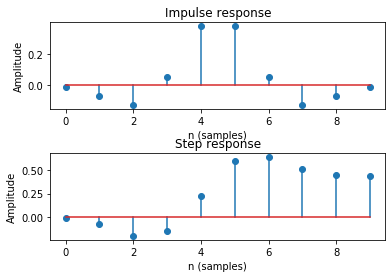

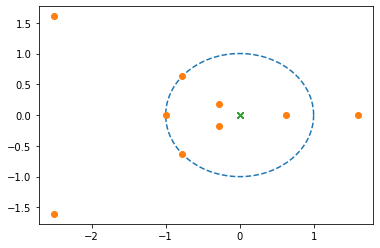

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


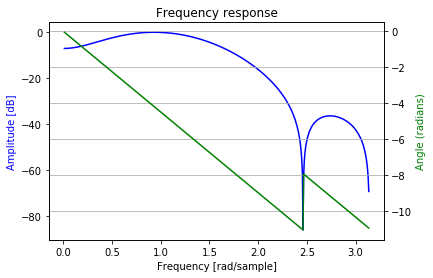

In [12]:
fs=8000 #Frecuencia de muestreo
start,stop = (0,50)
t=np.arange(start,stop,1/fs)  #vector de tiempo, donde la señal dura 50s.
uprate = 1
ws = 2*np.pi*((uprate*t)**2)
sig=np.sin(ws*t)

n = 10
num_fir = sx.firwin(n, [0.2, 0.4], pass_zero=False)
den_fir=np.zeros(n)
den_fir[0] = 1

zt.impz(num_fir, den_fir)
zt.zeropoles(num_fir, den_fir)
zt.mfreqz(num_fir, den_fir)


#### 4.2. Use la función computeZ(num, den, zeros, poles, data) que se encuentra en el archivo adjunto (ztrans.py) para agregar polos y ceros a una función de transferencia. Observe un ejemplo a continuación:

#### 4.3. Explique el comportamiento del sistema si se agrega de forma independiente:
- Dos ceros conjugados de magnitud 0.9
- Un polo real de magnitud 1.2

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


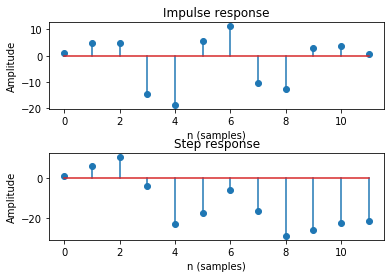

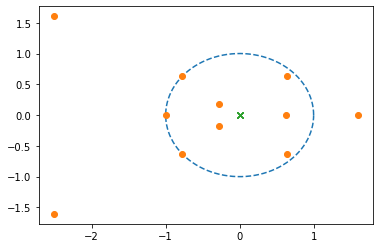

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


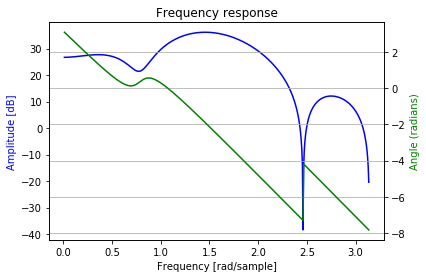

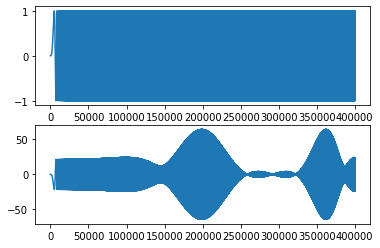

In [13]:
# Dos ceros conjugados de magnitud 0.9
num2 = [complex((0.9/np.sqrt(2)),(0.9/np.sqrt(2))),complex((0.9/np.sqrt(2)),(-1*0.9/np.sqrt(2)))]
den2 = []
zt.computeZ(num_fir, den_fir, num2, den2, sig)

- Al agregar los ceros la cantidad de puntos en la respuesta al impulso aumenta en la cantidad de ceros agregados
- El sistema sigue siendo estable (lo que tiene sentido porque solo se agregaron ceros)
- Se modificaron las frecuencias de corte
- La fase dejo de ser lineal
- El filtro ahora puede tener un efecto de amplificación, veamos que el máximo de las respuesta en frecuencia ahora esta por encima de los 30dB y en la gráfica de la señal se ve que el máximo es 50 (en contraste con la señal original que es de 1))

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


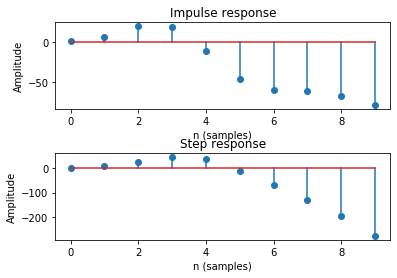

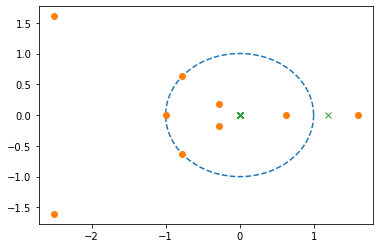

Y:\code\pds_lab\Lab5_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


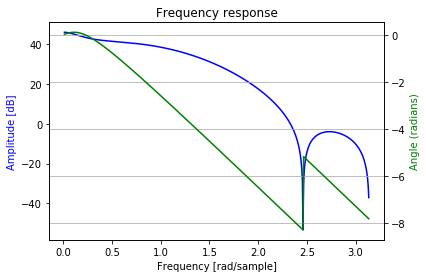

C:\software\anaconda3\lib\site-packages\matplotlib\ticker.py:2039: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
C:\software\anaconda3\lib\site-packages\matplotlib\ticker.py:2063: RuntimeWarning: overflow encountered in double_scalars
  best_vmin = (_vmin // step) * step
C:\software\anaconda3\lib\site-packages\matplotlib\ticker.py:1872: RuntimeWarning: invalid value encountered in double_scalars
  d, m = divmod(x, self.step)
C:\software\anaconda3\lib\site-packages\matplotlib\ticker.py:1879: RuntimeWarning: invalid value encountered in double_scalars
  d, m = divmod(x, self.step)


ValueError: arange: cannot compute length

In [14]:
# Un polo real de magnitud 1.2
from pylab import figure,show,subplot,plot
num2 = []
den2 = [1.2]
zt.computeZ(num_fir, den_fir, num2, den2, sig)



- Lo primero que observamos es que la función tiene problemas cuando trata de graficar la señal filtrada
- Lo anterior ocurre porque la señal filtrada calculada posee valores NaNs
- Y esto a su vez fue porque el filtro era inestable ya que agregamos un polo fuera del circulo unitario
- Al ser inestable al pasar una señal por el filtro el computo de la señal filtrada probablemente hizo overflow lo que hizo que se insertarán valores NaNs

### 5. Conclusiones Generales


- El diagrama de polos y ceros nos permite evaluar la estabilidad del sistema, si se tiene algun polo fuera del circulo unitario entonces el sistema es inestable
- La gráfica de la respuesta al impulso tambien nos dice indicios acerca de la estabilidad del sistema
- La gráfica de la respuesta al escalón puede decirnos algo de la estabilidad del sistema pero no de forma estricta y general
- Mientras más grande el orden del filtro más muestras de la señal se necesitan para computar la señal filtrada
- Al aumentar el orden del filtro más lobulos aparecen en la respuesta en frecuencia lo cuál se conoce como rizado
- Los efectos de aliasing deben ser tenidos en cuenta a la hora de aplicar un filtro (y siempre en general)
- Agregar ceros/polos de forma arbitraria puede hacer que el filtro funcione como amplificador
- Es importante tener claro el concepto de frecuencia normalizada para el diseño y análisis de las graficas de los filtros